# Particle Image Velocimetry 

In [1]:
import openpiv.tools
import openpiv.process
import openpiv.scaling
import openpiv.validation
import openpiv.filters
import openpiv.preprocess
import numpy
import cv2
import matplotlib.pyplot
%matplotlib inline
import skimage

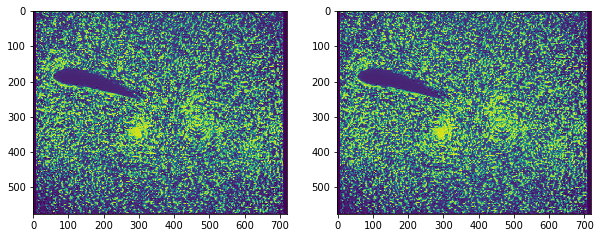

In [7]:
dt = 0.012      #time between images
path1 = 'Sequence1/all_images__00012848.jpg'
path2 = 'Sequence1/all_images__00012849.jpg'
img_a  = openpiv.tools.imread(path1)
img_b  = openpiv.tools.imread(path2)

fig = matplotlib.pyplot.figure(figsize=[10,10])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(img_a)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(img_b)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<matplotlib.figure.Figure at 0x7f9a58ca5978>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a58d19080>,
       dtype=object))

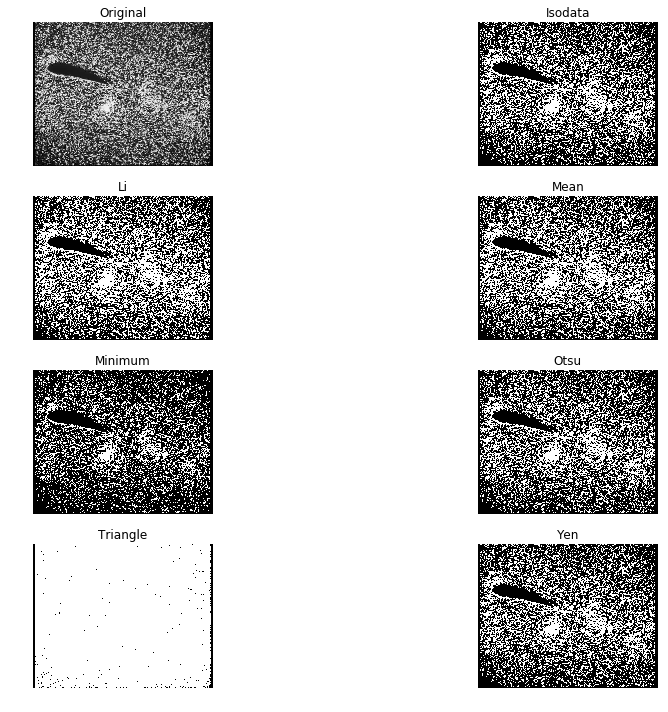

In [13]:
skimage.filters.try_all_threshold(img_a,figsize=(16, 10), verbose=True)

In [141]:
cv2.ellipse?
#img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]
cv2.polylines?
cv2.rectangle?

## Masking with opencv (cv2) - image processing package: 
### Segmentation by thresholding (region based segmentation) 

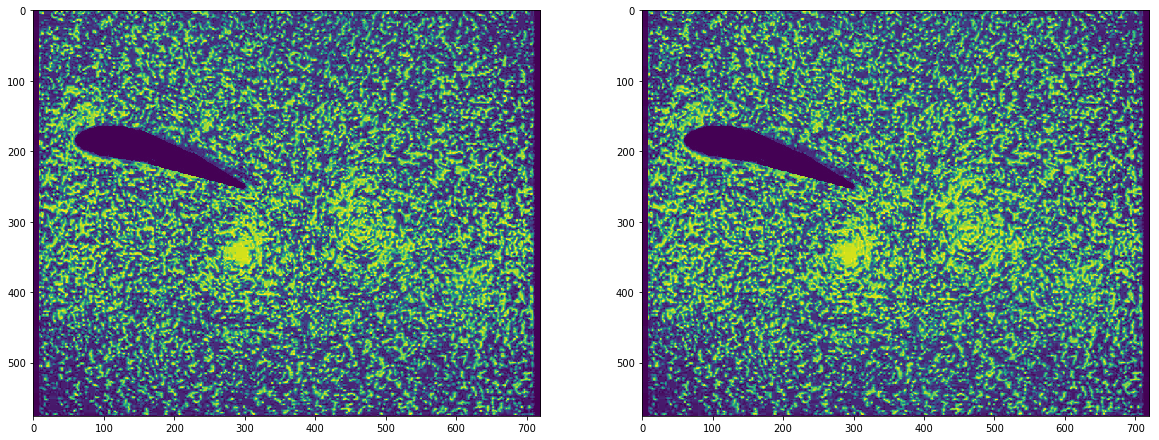

In [226]:
imga = cv2.imread(path1)
imgb = cv2.imread(path2)
#imgc = cv2.imread(path3)
cv2.circle(imga, (100,185), 22, (0,0, 0), -1) #drawing a circle to mask
cv2.circle(imgb, (100,185), 22, (0,0, 0), -1) #drawing a circle to mask

cv2.circle(imga, (150,195), 19, (0,0, 0), -1) #drawing a circle to mask
cv2.circle(imgb, (150,195), 19, (0,0, 0), -1) #drawing a circle to mask

cv2.circle(imga, (125,190), 19, (0,0, 0), -1) #drawing a circle to mask
cv2.circle(imgb, (125,190), 19, (0,0, 0), -1) #drawing a circle to mask


cv2.ellipse(imga,(110,184),(50,20),0,0,360,0,-1)
cv2.ellipse(imgb,(110,184),(50,20),0,0,360,0,-1)
#cv2.circle(imgc, (134,290), 100, (0,0, 0), -1) #drawing a circle to mask

#pts = numpy.array([[223,200],[298,248],[165,218]], numpy.int32)
#pts = pts.reshape((-1,1,2))
#cv2.polylines(img,[pts],True,(0,255,255))

#cv2.polylines(imgb,[pts], True, (0,0,0))
cv2.line(imga,(225,205),(298,250),(0,0,0),5)
cv2.line(imga,(298,250),(165,215),(0,0,0),5)
cv2.line(imgb,(225,205),(298,250),(0,0,0),5)
cv2.line(imgb,(298,250),(165,215),(0,0,0),5)

cv2.line(imga,(150,202),(298,250),(0,0,0),5)
cv2.line(imga,(150,198),(298,250),(0,0,0),5)
cv2.line(imga,(150,195),(298,250),(0,0,0),5)
cv2.line(imga,(150,190),(298,250),(0,0,0),5)
cv2.line(imga,(150,185),(298,250),(0,0,0),5)
cv2.line(imga,(150,180),(298,250),(0,0,0),5)
cv2.line(imga,(150,175),(298,250),(0,0,0),5)
cv2.line(imga,(156,175),(298,250),(0,0,0),5)

#cv2.line(imga,(156,175),(165,205),(0,0,0),5)
cv2.line(imga, (150,172), (239,213), (0,0,0),5)
cv2.line(imga, (110,205), (141,210), (0,0,0),5)
cv2.line(imga, (141,205),(161,208), (0,0,0),11)

cv2.line(imgb,(150,202),(298,250),(0,0,0),5)
cv2.line(imgb,(150,198),(298,250),(0,0,0),5)
cv2.line(imgb,(150,195),(298,250),(0,0,0),5)
cv2.line(imgb,(150,190),(298,250),(0,0,0),5)
cv2.line(imgb,(150,185),(298,250),(0,0,0),5)
cv2.line(imgb,(150,180),(298,250),(0,0,0),5)
cv2.line(imgb,(150,175),(298,250),(0,0,0),5)
cv2.line(imgb,(156,175),(298,250),(0,0,0),5)

#cv2.line(imga,(156,175),(165,205),(0,0,0),5)
cv2.line(imgb, (150,172), (239,213), (0,0,0),5)
cv2.line(imgb, (110,205), (141,210), (0,0,0),5)
cv2.line(imgb, (141,205),(161,208), (0,0,0),11)

cv2.imwrite("maskSeq1img1_.jpg", imga)
cv2.imwrite("maskSeq1img2_.jpg", imgb)
#cv2.imwrite("maskSeq2img3.jpg", imgc)
mask1 = cv2.imread('maskSeq1img1_.jpg', cv2.IMREAD_GRAYSCALE) 
mask2 = cv2.imread('maskSeq1img2_.jpg', cv2.IMREAD_GRAYSCALE) 
#mask3 = cv2.imread('maskSeq2img3.jpg', cv2.IMREAD_GRAYSCALE) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(mask1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(mask2)


In [238]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
                
            else:
                cv2.circle(img1,(x,y),7,(0,0,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
        else:
            cv2.circle(img1,(x,y),7,(0,0,0),-1)

#img1 = cv2.imread(path1)
img1 = cv2.imread('maskSeq1img1.jpg')
cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
cv2.setMouseCallback('image',draw_circle)

while(1):  #while True
    cv2.imshow('image',img1)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # ESC on keyboard closes the window
        cv2.destroyAllWindows()
        break
    elif k == ord('m'):
        mode = not mode
    elif k == ord('s'):  #if "s" is pressed on the keyboard,  
        cv2.imwrite("maskSeq1img1.jpg", img1)
        cv2.destroyAllWindows()                         #and the window is closed
        break
cv2.destroyAllWindows()

In [240]:
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
                
            else:
                cv2.circle(img1,(x,y),7,(0,0,0),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img1,(ix,iy),(x,y),(0,0,0),-1)
        else:
            cv2.circle(img1,(x,y),7,(0,0,0),-1)

#img1 = cv2.imread(path2)
img1 = cv2.imread('maskSeq1img2.jpg')
cv2.namedWindow('image',cv2.WINDOW_NORMAL) 
cv2.setMouseCallback('image',draw_circle)

while(1):  #while True
    cv2.imshow('image',img1)
    k = cv2.waitKey(20) & 0xFF
    if k == 27: # ESC on keyboard closes the window
        cv2.destroyAllWindows()
        break
    elif k == ord('m'):
        mode = not mode
    elif k == ord('s'):  #if "s" is pressed on the keyboard,  
        cv2.imwrite("maskSeq1img2.jpg", img1)
        cv2.destroyAllWindows()                         #and the window is closed
        break
cv2.destroyAllWindows()

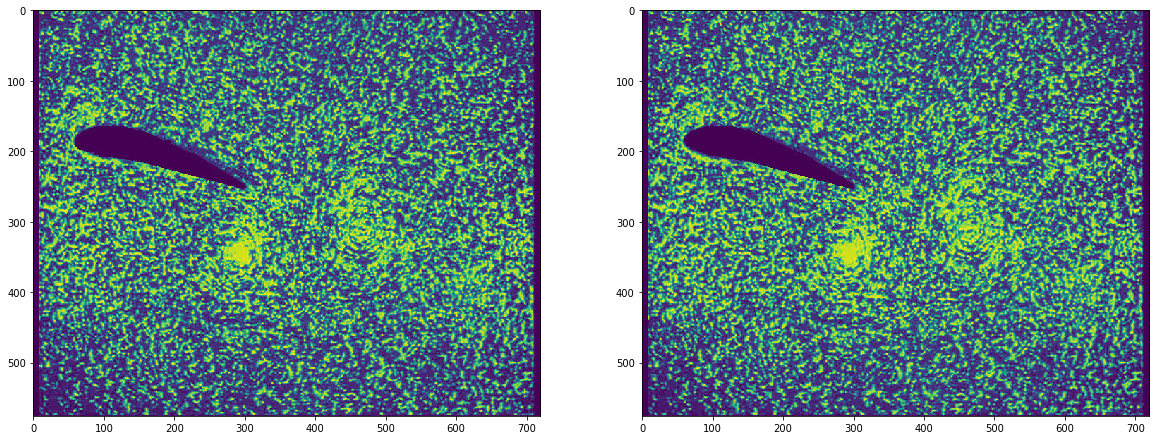

In [241]:
mask1 = cv2.imread('maskSeq1img1.jpg', cv2.IMREAD_GRAYSCALE) 
mask2 = cv2.imread('maskSeq1img2.jpg', cv2.IMREAD_GRAYSCALE)
fig = matplotlib.pyplot.figure(figsize=[20,20])
ax = fig.add_subplot(1, 2, 1)
ax.imshow(mask1)
ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(mask2)

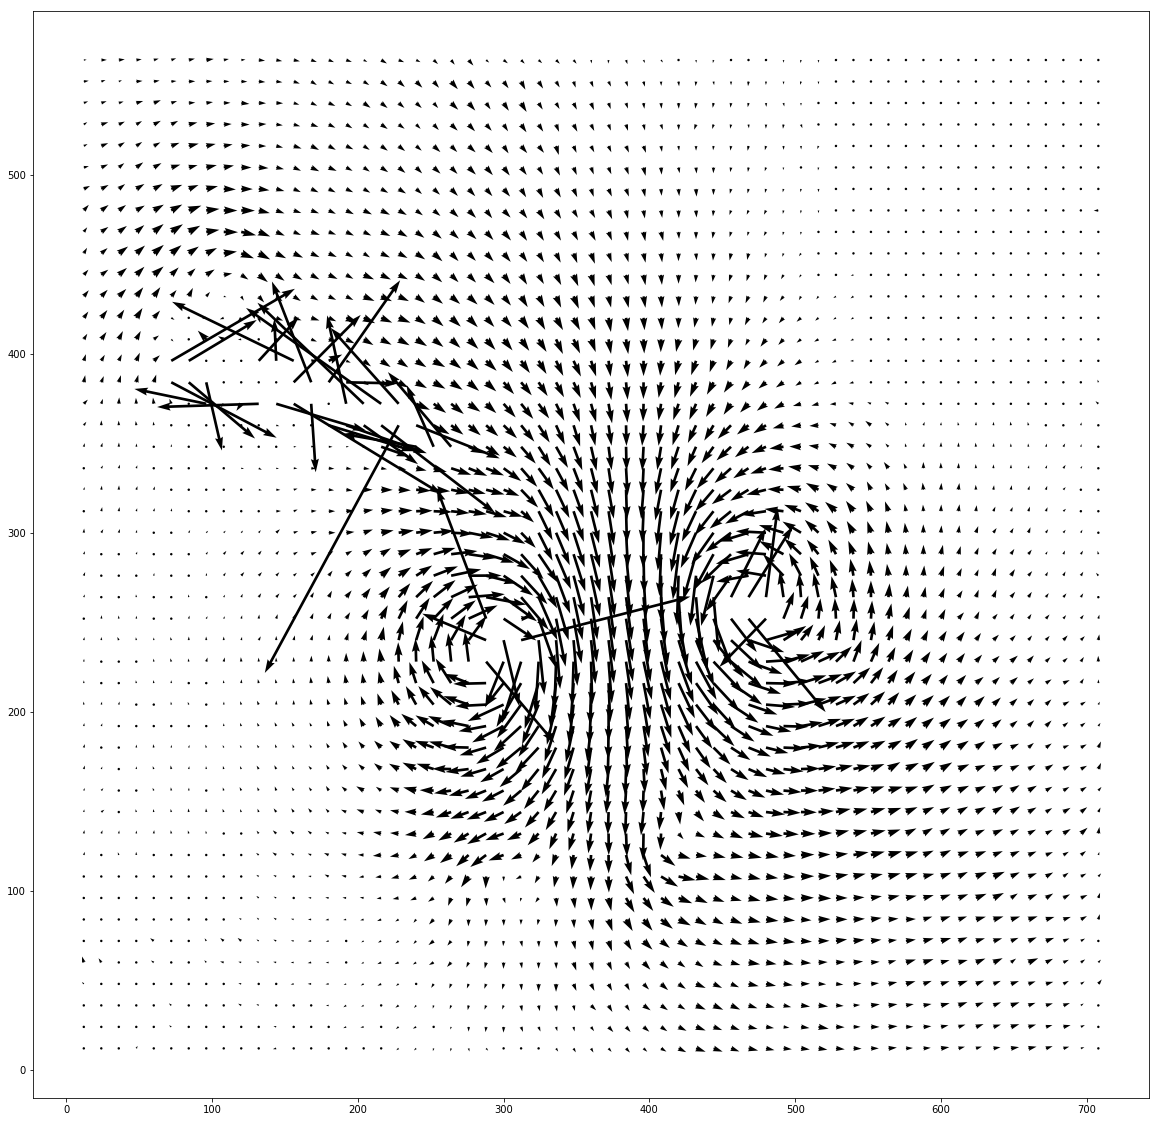

In [245]:
window_size= 24 #30
search_areasize = 50 #110
overlap = 12 #15

u, v, sig2noise = openpiv.process.extended_search_area_piv(mask1.astype(numpy.int32),
                                                           mask2.astype(numpy.int32),
                                                           window_size=window_size,    #24
                                                           overlap=overlap, dt=dt, #12
                                                           search_area_size=search_areasize, 
                                                           subpixel_method= 'gaussian',
                                                           sig2noise_method='peak2peak' ) 
#'centroid' [replaces default if correlation map is negative], 
#    'gaussian' [default if correlation map is positive], 
#     'parabolic'.
#sig2noise_method specifies which method to use for the evalutaion of the signal/noise ratio.
#The function also returns a third array, sig2noise which contains the signal to noise ratio obtained 
#from each cross-correlation function, intended as the ratio between the heigth of the first and second peaks.
 # get window centers coordinates: We then compute the coordinates of the centers of the interrogation windows 
#using openpiv.process.get_coordinates().: (same options we have given in the previous command to the processing function.)
x, y = openpiv.process.get_coordinates( image_size=img_a.shape, window_size=window_size, overlap=overlap) 
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u, v )
#matplotlib.pyplot.scatter(x, y, color='r', s=5)

fig.savefig('primeiraSeq1.pdf')

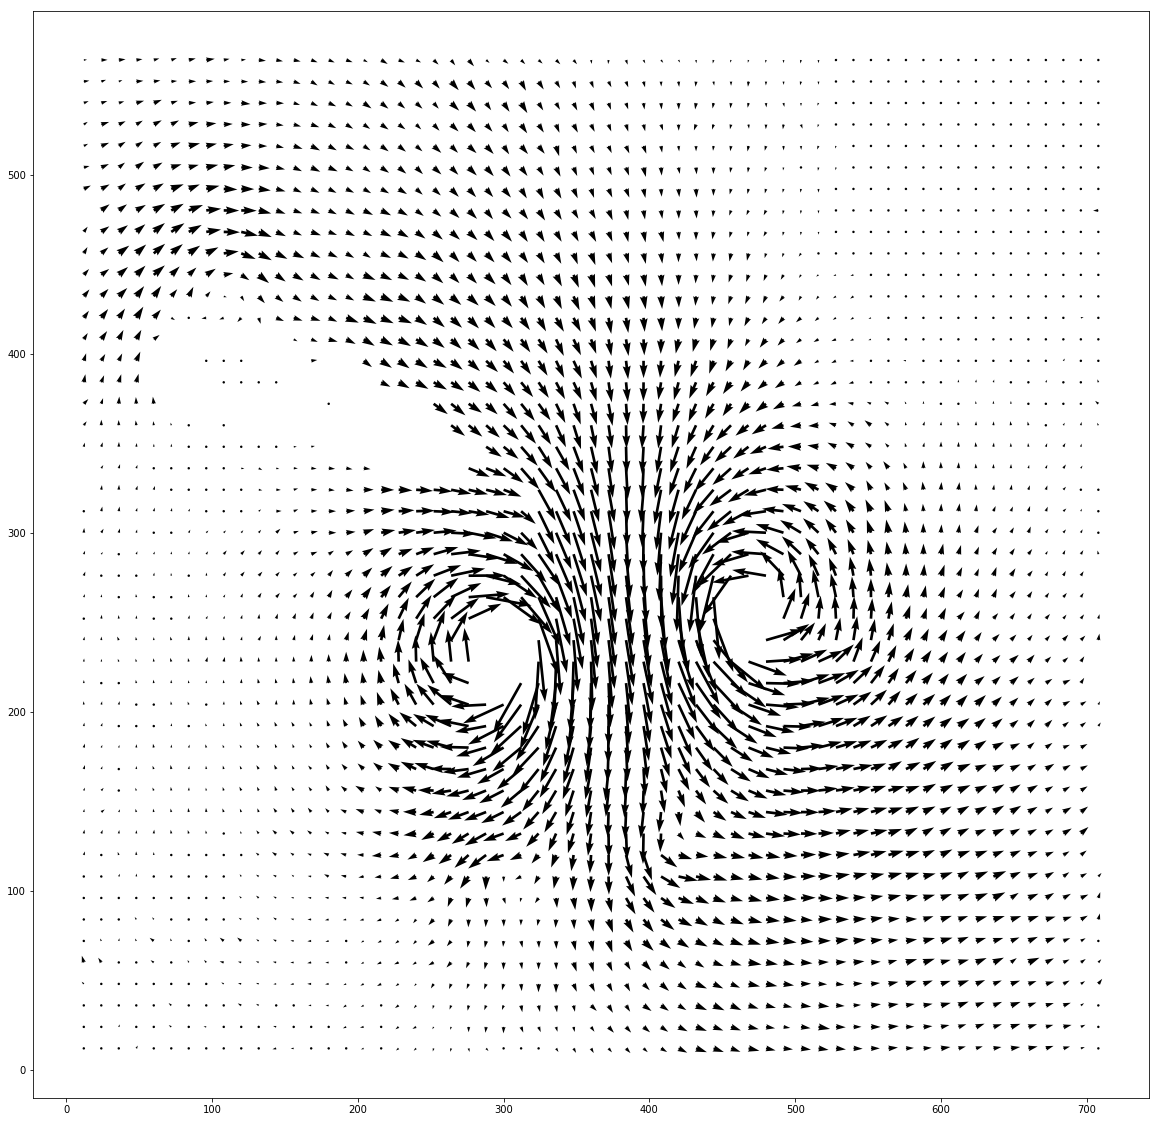

In [246]:
u1, v1, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = 1.3 )#1.3
#u1, v1, mask = openpiv.validation.global_val( u, v, (-55000, 15000), (-15000, 15000) )
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u1, v1 )

/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/anacos/anaconda3/envs/workshop2/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


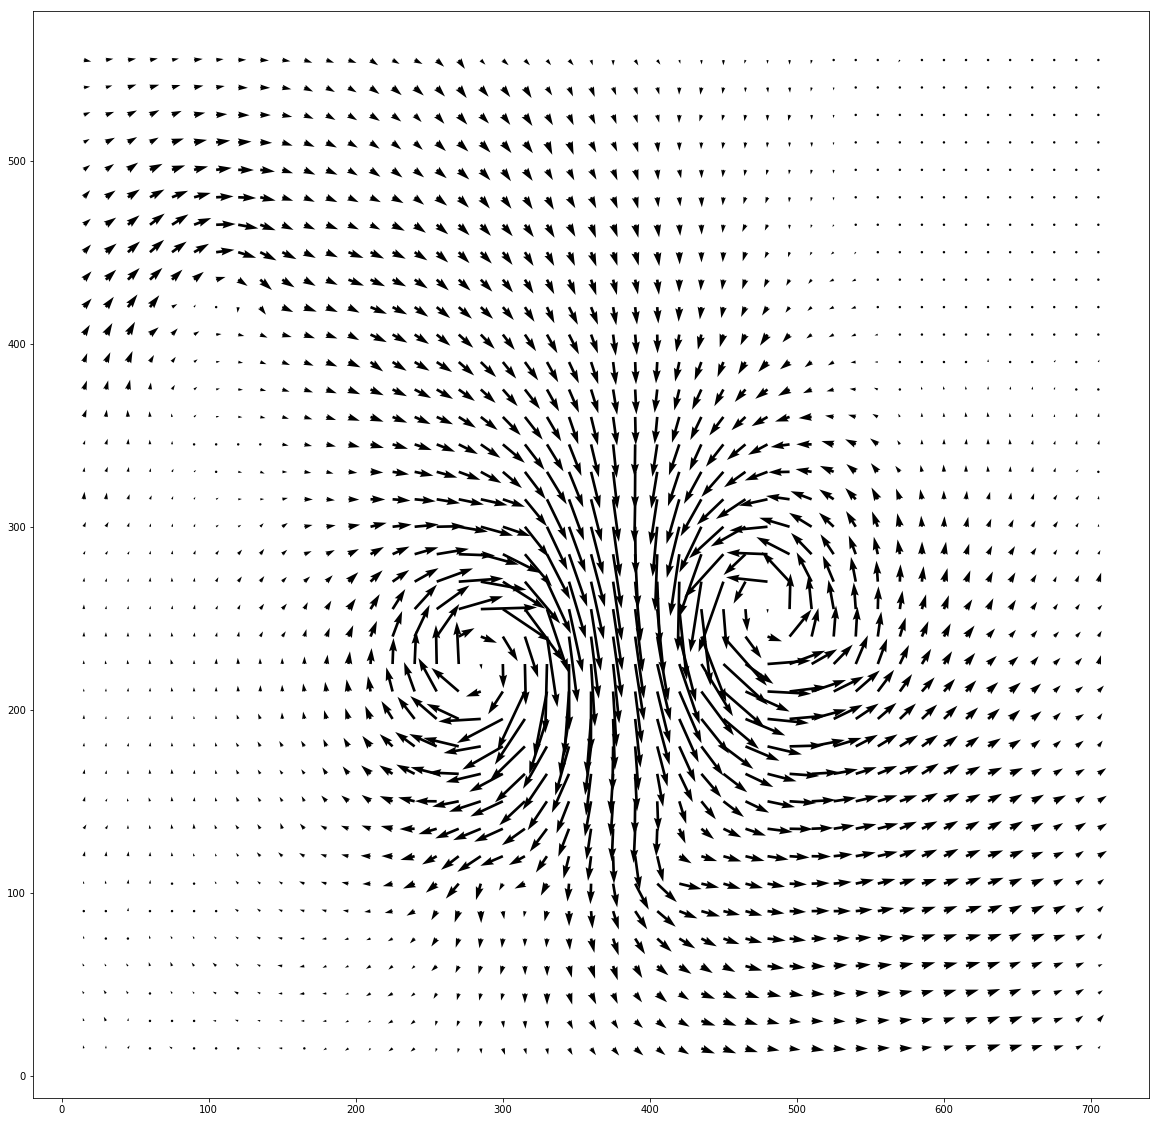

In [54]:
u, v = openpiv.filters.replace_outliers( u1, v1, method='localmean', max_iter=15, tol= 0.0001, kernel_size=2 )
fig = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.quiver( x, y, u, v )